# 生成数据

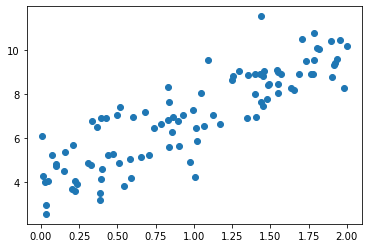

In [39]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)
X = x.reshape(-1,1)
plt.scatter(x,y)
plt.show()

In [40]:
X.shape


(100, 1)

In [41]:
y.shape

(100,)

# 定义目标最小二乘函数

In [42]:
def J(theta, X_b, y):
    try:
        return np.sum((y-X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

def dj(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return res * 2/ len(X_b)

# 定义梯度下降函数 

In [43]:
def gradient_descent(X_b, y, init_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = init_theta
    i_iter=0
    
    while i_iter < n_iters:
        gradient = dj(theta, X_b, y)
        last_theta = theta
        theta = last_theta - gradient * eta
        
        if (abs(J(theta, X_b, y)-J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
        
    return theta


# 执行测试

In [44]:
X_b = np.hstack([np.ones((len(X),1)), X])
init_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, init_theta, eta)
theta

array([4.02145786, 3.00706277])

# QA

## 1. 如何将类别型变量引入线性回归，提出至少1种方案？

* Ordinal encoding（顺序编码）：
    当类别变量中的分类有重要性或者顺序的区别时，为每个不同的分类变量值赋一个不同的整数值。这个方法在树类型的模型中效果较好。
* One-Hot Encoding（独热码）：
    根据原分类变量创建一个01矩阵：若原数据中i行含有j类型变量，则新矩阵中i行j列为1，反则为0。适用于没有内在顺序关系的“名义变量”，且如果分类过多效果也不好。

## 2. 自变量进行标准化会对模型带来哪些影响（尝试从梯度、回归系数等⻆度）？尝试在项目过程中进行实验。

* 数据的标准化是将数据按比例缩放，使之落入一个小的特定区间，在某些比较和评价的指标处理中经常会用到，去除数据的单位限制，将其转化为无量纲的纯数值，**便于不同单位或量级的指标能够进行比较和加权**。
* 常见的标准化方式包括：
  * **标准差标准化**（标准正态分布） `sklearn.preprocessing.StandardScaler().fit_transform()`
  * **线性标准化**（0,1区间） `sklearn.preprocessing.MinMaxScaler().fit_transform()`
  * 为什么X_train标准化是用fit_transform()，而X_test标准化是用transform()呢？
fit_transform()干了两件事：fit找到数据转换规则，并将数据标准化
transform：是将数据进行转换，比如数据的归一化和标准化，将测试数据按照训练数据同样的模型进行转换，得到特征向量。可以直接把转换规则拿来用，所以并不需要fit_transform()，否则，两次标准化后的数据格式（或者说数据参数）就不一样了
* 标准化的好处有：
  * **提高梯度下降迭代速度**，加快模型收敛速度
  * 取消量纲的影响，**使回归系数可以做比较**
  * 提升模型的精度
  * 深度学习中可以防止模型梯度爆炸
* 在项目中分别尝试了不标准化和标准化的线性回归，发现标准化后模型的精度变化不大，但是梯度下降的速度明显提高了，回归相比没有标准化的数据能节省约一倍的时间。


# 项目